In [ ]:
# TODO:
"""

"""

In [335]:
%matplotlib inline
%mkdir figures
from load_data import load_heart_disease, load_diabetes
from datetime import datetime
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Clustering algos
from sklearn.cluster import KMeans, FeatureAgglomeration
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import SparseRandomProjection

from sklearn.neural_network import MLPClassifier

seed = 1
np.random.seed(seed)
test_ratio = .2

dset = "heart"
save_dir = "figures"
x, y = load_heart_disease()
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=test_ratio, stratify=y, random_state=seed)
validation_splits = 5
kf = KFold(n_splits=validation_splits)
def r_err(y_te, y_pred): # return error
    return round(1 - accuracy_score(y_te, y_pred), 3)

mkdir: cannot create directory ‘figures’: File exists


In [186]:
# Clustering Hyperparams
cluster_range = range(2,9)

# KMeans
kmeans_models = [KMeans(n_clusters=i, random_state=seed).fit(x) for i in cluster_range]
kmeans_labels = [model.labels_ for model in kmeans_models]
kmeans_centers = [model.cluster_centers_ for model in kmeans_models]

# EM
em_models = [GaussianMixture(n_components=i, random_state=seed).fit(x) for i in cluster_range]
em_labels = [model.predict(x) for model in em_models]
em_centers = [model.means_ for model in em_models]

In [189]:
# Project clustering down to two components for visualization
pca = PCA(n_components=2, random_state=seed)
pca.fit(x)
projected_data = pca.transform(x)

projected_kmeans_centers = []
for center_list in kmeans_centers:
    projected_kmeans_centers.append(pca.transform(center_list))
    
projected_em_centers = []
for center_list in em_centers:
    projected_em_centers.append(pca.transform(center_list))

/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


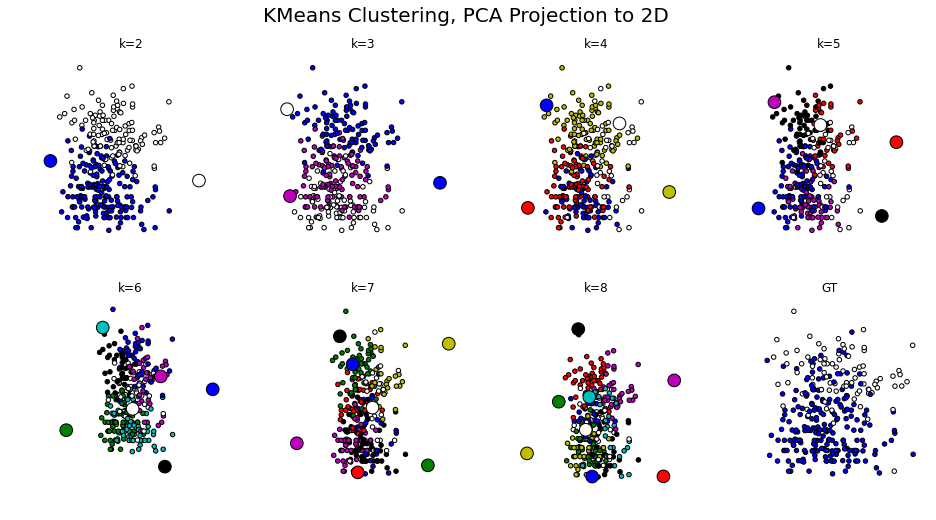

In [336]:
colors = ['b','g','r','c','m','y','k','w']
fig, axes = plt.subplots(2,4, figsize=(16,8))
axes = axes.reshape(-1)
for i in range(len(labels)):
    ax = axes[i]
    ax.set_axis_off()
    ax.scatter(projected_data[:,0], projected_data[:,1], c=kmeans_labels[i], cmap=matplotlib.colors.ListedColormap(colors))
    ax.scatter(projected_kmeans_centers[i][:,0], projected_kmeans_centers[i][:,1], s=160, c=np.arange(i+2), cmap=matplotlib.colors.ListedColormap(colors))
    ax.set_title("k={}".format(i+2))
axes[-1].scatter(projected_data[:,0], projected_data[:,1], c=y, cmap=matplotlib.colors.ListedColormap(colors))
axes[-1].get_xaxis().set_ticks([])
axes[-1].get_yaxis().set_ticks([])
axes[-1].set_title("GT")
axes[-1].set_axis_off()
fig.suptitle("KMeans Clustering, PCA Projection to 2D", size=20)
fig.savefig("{}/{}_kmeans_proj.png".format(save_dir, dset))

/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


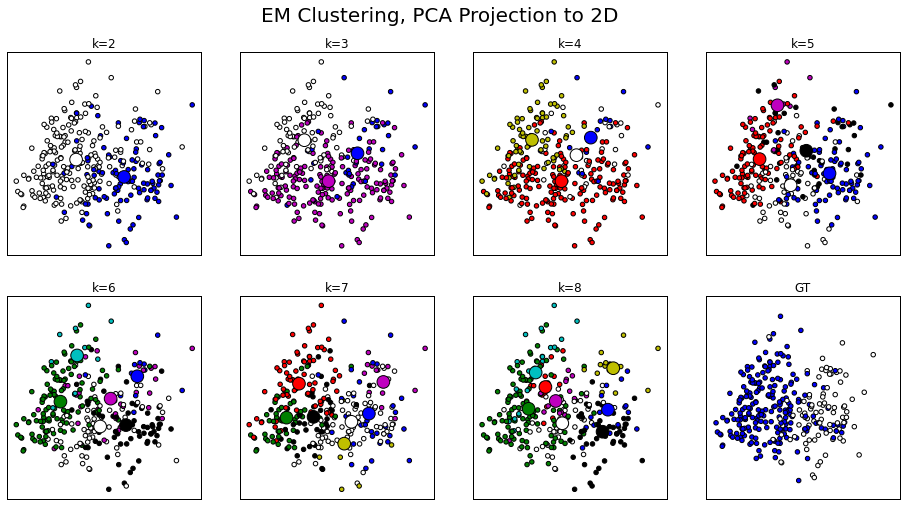

In [192]:
fig, axes = plt.subplots(2,4, figsize=(16,8))
axes = axes.reshape(-1)
for i in range(len(labels)):
    ax = axes[i]
    ax.set_axis_off()
    ax.scatter(projected_data[:,0], projected_data[:,1], c=em_labels[i], cmap=matplotlib.colors.ListedColormap(colors))
    ax.scatter(projected_em_centers[i][:,0], projected_em_centers[i][:,1], s=160, c=np.arange(i+2), cmap=matplotlib.colors.ListedColormap(colors))
    ax.set_title("k={}".format(i+2))
axes[-1].scatter(projected_data[:,0], projected_data[:,1], c=y, cmap=matplotlib.colors.ListedColormap(colors))
axes[-1].get_xaxis().set_ticks([])
axes[-1].get_yaxis().set_ticks([])
axes[-1].set_title("GT")
axes[-1].set_axis_off()
fig.suptitle("EM Clustering, PCA Projection to 2D", size=20)
fig.savefig("{}/{}_em_proj.png".format(save_dir, dset))

KMeans Homogeneity: 0.34555565036921126, Completeness: 0.3874209759149471, V Measure: 0.36529270511025436
EM Homogeneity: 0.1039196656093302, Completeness: 0.11120162409972949, V Measure: 0.10743739596659409


/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


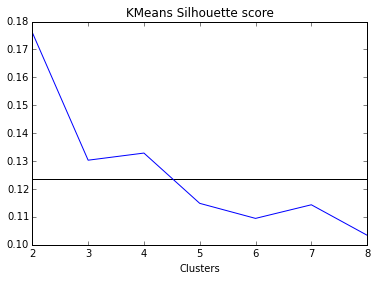

In [338]:
# Other metrics for analyzing clustering
import sklearn.metrics as metrics

# Note that since completeness depends on binary label, it naturally goes down - makes sense that mutual info is bad for higher ranges
# Note the separation of cluster and label (in general, but not for labelled metrics)
# Homogeneity can be done for k != 2 clusters
v_measure_means = metrics.homogeneity_completeness_v_measure(kmeans_labels[0], y)
v_measure_em = metrics.homogeneity_completeness_v_measure(em_labels[0], y)
print("KMeans Homogeneity: {}, Completeness: {}, V Measure: {}".format(v_measure_means[0], v_measure_means[1], v_measure_means[2]))
print("EM Homogeneity: {}, Completeness: {}, V Measure: {}".format(v_measure_em[0], v_measure_em[1], v_measure_em[2]))
kmeans_silhouettes = []
em_silhouettes = []
for i in range(len(kmeans_labels)):
    kmeans_silhouettes.append(metrics.silhouette_score(x, kmeans_labels[i], metric='euclidean'))
    em_silhouettes.append(metrics.silhouette_score(x, em_labels[i], metric='euclidean'))
true_silhouette = metrics.silhouette_score(x,y,metric='euclidean')
plt.plot(kmeans_silhouettes)
plt.hlines(true_silhouette,0,len(kmeans_labels) - 1)
plt.xlabel("Clusters")
plt.xticks(range(len(cluster_range)), cluster_range)
# plt.yticks([])
plt.title("KMeans Silhouette score")
plt.savefig("{}/{}_kmeans_silhouette.png".format(save_dir, dset))

/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


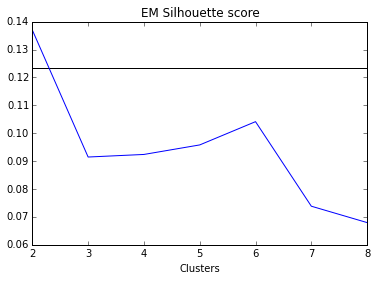

In [337]:
plt.plot(em_silhouettes)
plt.hlines(true_silhouette,0,len(em_labels) - 1)
plt.xlabel("Clusters")
plt.xticks(range(len(cluster_range)), cluster_range)
# plt.yticks([])
plt.title("EM Silhouette score")
plt.savefig("{}/{}_em_silhouette.png".format(save_dir, dset))

In [291]:
# Part two: Just reduce the dimensions
# Project clustering down to two components for visualization
dim_red = {}
dim_red['pca'] = []
dim_red['ica'] = []
dim_red['ran'] = []
dim_red['agg'] = []

# 2, 3, 4, 5 - since diabetes only has around 8 features
num_features = range(2,6)
for i in num_features:
    for red in dim_red:
        if red == 'pca':
            method = PCA(n_components=i, random_state=seed)
        elif red == 'ica':
            method = FastICA(n_components=i, random_state=seed)
        elif red == 'ran':
            method = SparseRandomProjection(n_components=i, random_state=seed)
        elif red == 'agg':
            method = FeatureAgglomeration(n_clusters=i)
        method.fit(x)
        dim_red[red].append(method.transform(x))
# Also experiment - different red method hyperparams

In [258]:
from scipy.stats import skew, kurtosis
stats = {}
stats['var'] = {}
stats['skew'] = {}
stats['kur'] = {}
# Best shown in tabular data
for i, red, in enumerate(dim_red):
    for stat in stats:
        stats[stat][red] = []
    for j, projection in enumerate(dim_red[red]):
        stats['var'][red].append(np.var(projection, axis=0))
        stats['skew'][red].append(skew(projection, axis=0))
        stats['kur'][red].append(kurtosis(projection, axis=0))
print(stats['var']['ica'][3])
print(stats['skew']['ica'][3])
print(stats['kur']['ica'][3])
# Note ICA identical variance and PCA decreasing variance
# Rnadom Projection has greater variance?
# Aggregation shows mountain shape

[0.00331126 0.00331126 0.00331126 0.00331126 0.00331126]
[-0.59840062 -0.61673742 -0.13535101 -0.004585    0.32309718]
[ 1.38831723  0.15805983 -0.28878268 -0.73077489 -1.03379228]


/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


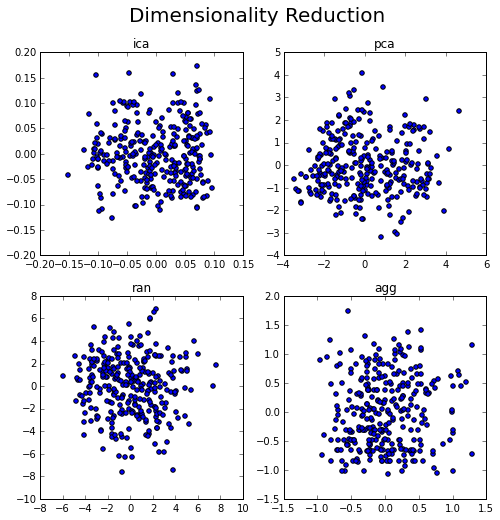

In [290]:
# 2D comparisons
fig, axes = plt.subplots(2,2, figsize=(8,8))
axes = axes.reshape(-1)
for i, red in enumerate(dim_red):
    projected_data = dim_red[red][0]
    ax = axes[i]
    ax.scatter(projected_data[:,0], projected_data[:,1])
    ax.set_title("{}".format(red))
fig.suptitle("Dimensionality Reduction", size=20)
fig.savefig("{}/{}_red_plain.png".format(save_dir, dset))
# Reduce to 1D if you have time
# Random seems gaussian
# ICA seems square
# Agglomeration seems the most well distributed
# Note range of random projection explains variance over ICA

/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


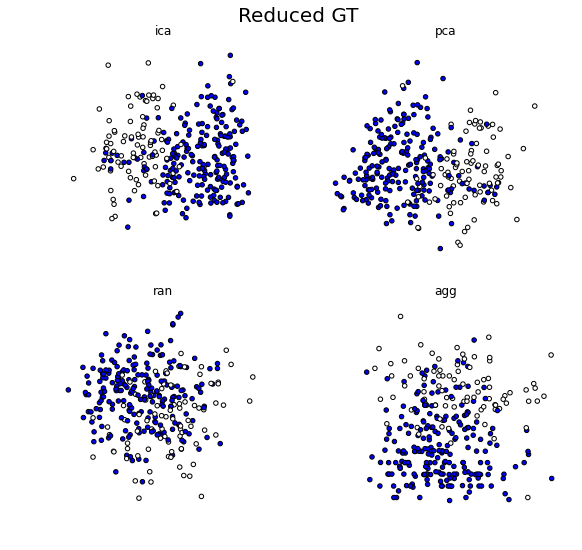

In [273]:
fig, axes = plt.subplots(2,2, figsize=(8,8))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
axes = axes.reshape(-1)
for i, red in enumerate(dim_red):
    projected_data = dim_red[red][0] # use 2D - 0 index
    ax = axes[i]
    ax.set_axis_off()
    ax.scatter(projected_data[:,0], projected_data[:,1], c=y, cmap=matplotlib.colors.ListedColormap(colors))
    ax.set_title("{}".format(red, j))
fig.suptitle("Reduced GT", size=20)
fig.savefig("{}/{}_red_gt.png".format(save_dir, dset))

/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


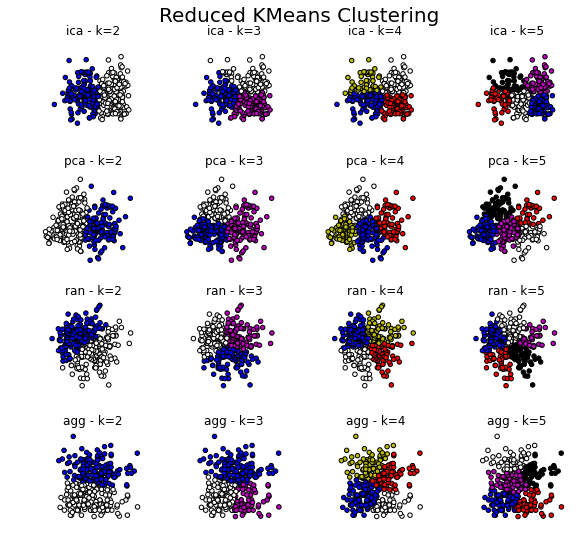

In [320]:
# Clustering on 2D Reductions (Refusing to reduce, cluster, then reduce again)
# 2D comparisons
red_cluster_range=range(2,6)
fig, axes = plt.subplots(4,4, figsize=(8,8))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

km_cluster_labels = {}
for i, red in enumerate(dim_red):
    km_cluster_labels[red] = []
    projected_data = dim_red[red][0] # use 2D - 0 index
    for k, j in enumerate(red_cluster_range):
        model = KMeans(n_clusters=j, random_state=seed).fit(projected_data)
        km_cluster_labels[red].append(model.labels_)
        ax = axes[i,k]
        ax.set_axis_off()
        ax.scatter(projected_data[:,0], projected_data[:,1], c=model.labels_, cmap=matplotlib.colors.ListedColormap(colors))
        ax.set_title("{} - k={}".format(red, j))
fig.suptitle("Reduced KMeans Clustering", size=20)
fig.savefig("{}/{}_red_km_cluster.png".format(save_dir, dset))

/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


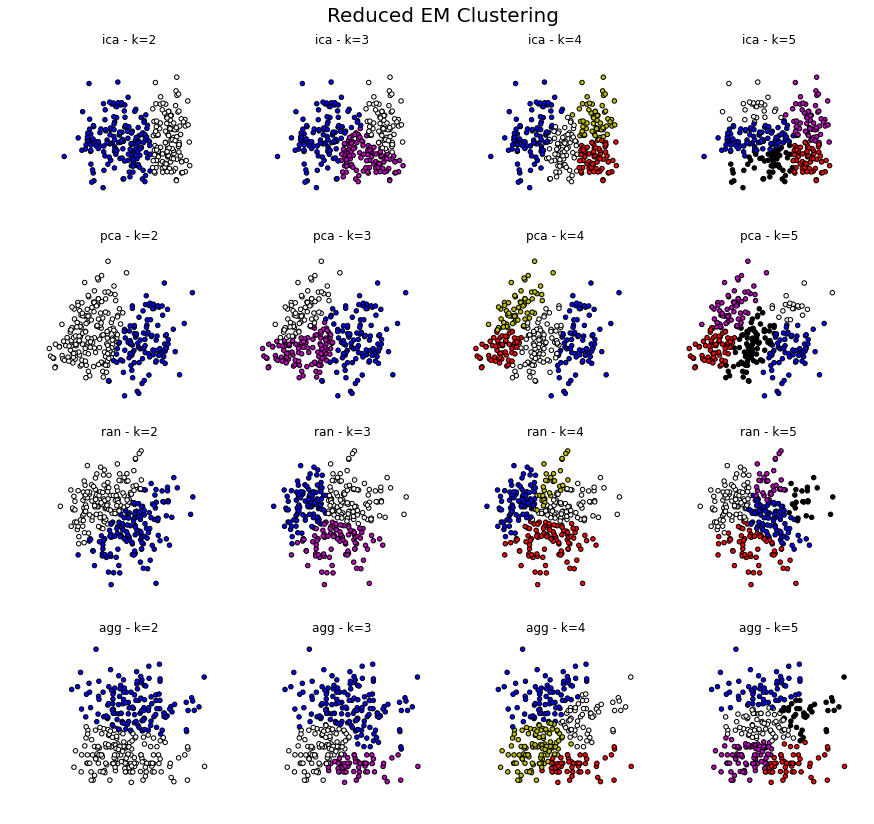

In [321]:
# Clustering on 2D Reductions (Refusing to reduce, cluster, then reduce again)
# 2D comparisons
red_cluster_range=range(2,6)
fig, axes = plt.subplots(4,4, figsize=(12,12))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

em_cluster_labels = {}
for i, red in enumerate(dim_red):
    em_cluster_labels[red] = []
    projected_data = dim_red[red][0] # use 2D - 0 index
    for k, j in enumerate(red_cluster_range):
        model = GaussianMixture(n_components=j, random_state=seed).fit(projected_data)
        em_cluster_labels[red].append(model.predict(projected_data))
        ax = axes[i,k]
        ax.set_axis_off()
        ax.scatter(projected_data[:,0], projected_data[:,1], c=em_cluster_labels[red][-1], cmap=matplotlib.colors.ListedColormap(colors))
        ax.set_title("{} - k={}".format(red, j))
fig.suptitle("Reduced EM Clustering", size=20)
fig.savefig("{}/{}_red_em_cluster.png".format(save_dir, dset))
# Overall cleaner cuts - this is definitely different from projecting

In [305]:
# Neural Net: https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# Baseline - arch chosen as good one from init experiments, and suitable for low dim
clf = MLPClassifier(solver='lbfgs', alpha=1e-3,
                     hidden_layer_sizes=(3, 3), random_state=seed)
accuracy = cross_val_score(clf, x_tr, y_tr, scoring='accuracy', cv=kf)
baseline = accuracy.mean() # Easy graph over number of classes here

In [307]:
# We have dim reduced data in dim_red[red][0-4] 
# We don't expect improvement as data is already low feature
net_acc = {}
for red in dim_red:
    net_acc[red] = []
    for reduced in dim_red[red]:
        net_acc[red].append(cross_val_score(clf, reduced, y, scoring='accuracy', cv=kf).mean())
print(net_acc['ica'])

[0.7218579234972677, 0.8608743169398906, 0.7218579234972677, 0.7218579234972677]


/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


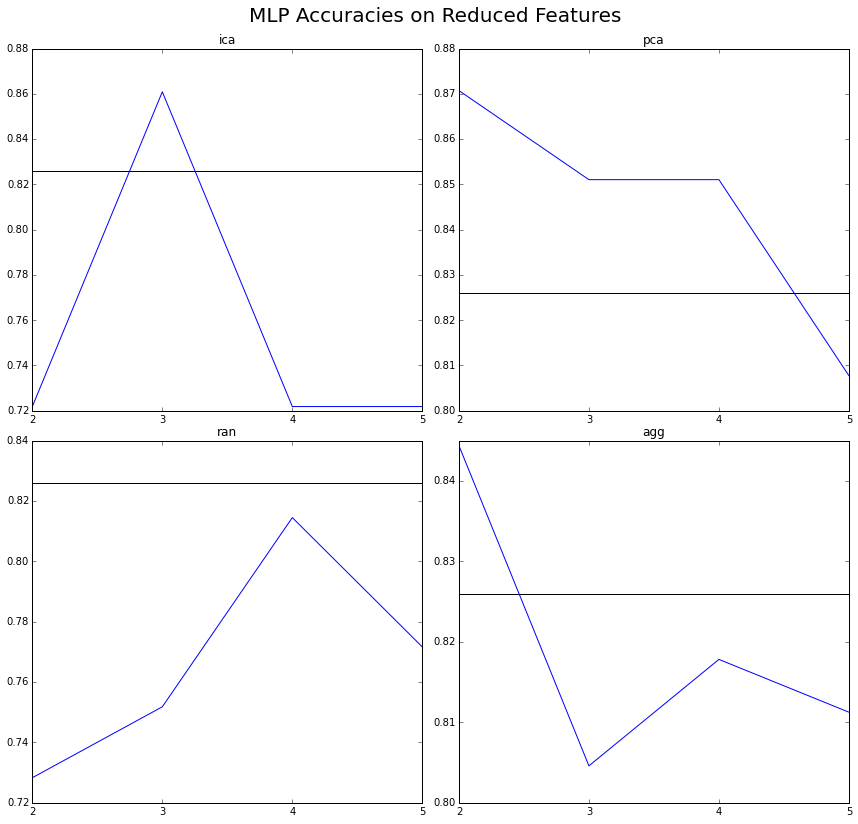

In [308]:
# Classifying on 2D Reductions (Refusing to reduce, cluster, then reduce again)
# 2D comparisons
fig, axes = plt.subplots(2,2, figsize=(12,12))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
axes = axes.reshape(-1)
for i, red in enumerate(dim_red):
    ax = axes[i]
    ax.plot(net_acc[red])
    ax.set_title("{}".format(red))
    ax.set_xticks(np.arange(len(num_features)))
    ax.set_xticklabels(num_features)
    ax.hlines(baseline,0,len(num_features) - 1)
    
fig.suptitle("MLP Accuracies on Reduced Features", size=20)
fig.savefig("{}/{}_red_net_acc.png".format(save_dir, dset))

In [322]:
# Stored in cluster_labels
net_acc_cluster_only = {}
net_acc_cluster_only['km'] = {}
net_acc_cluster_only['em'] = {}
for red in km_cluster_labels:
    net_acc_cluster_only['km'][red] = []
    for label in km_cluster_labels[red]:
        net_acc_cluster_only['km'][red].append(cross_val_score(clf, label[:, np.newaxis], y, scoring='accuracy', cv=kf).mean())
        
for red in em_cluster_labels:
    net_acc_cluster_only['em'][red] = []
    for label in em_cluster_labels[red]:
        net_acc_cluster_only['em'][red].append(cross_val_score(clf, label[:, np.newaxis], y, scoring='accuracy', cv=kf).mean())

/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


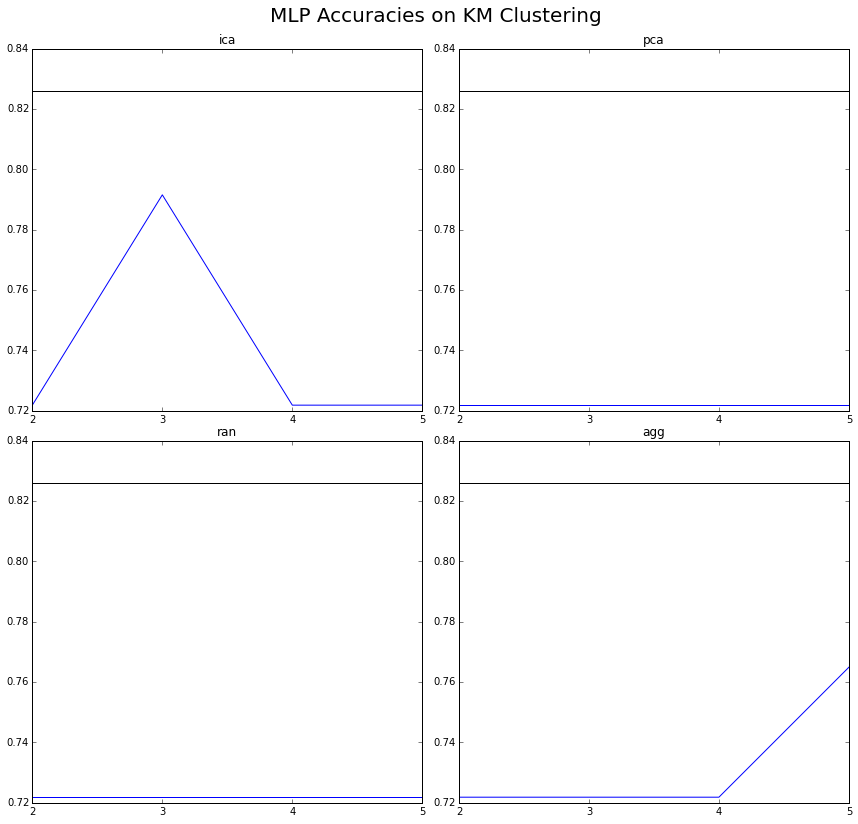

In [325]:
# Clustering on 2D Reductions (Refusing to reduce, cluster, then reduce again)
# 2D comparisons
fig, axes = plt.subplots(2,2, figsize=(12,12))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
axes = axes.reshape(-1)
for i, red in enumerate(km_cluster_labels):
    ax = axes[i]
    ax.plot(net_acc_cluster_only['km'][red])
    ax.set_title("{}".format(red))
    ax.set_xticks(np.arange(len(red_cluster_range)))
    ax.set_xticklabels(red_cluster_range)
    ax.hlines(baseline,0,len(red_cluster_range) - 1)
    
fig.suptitle("MLP Accuracies on KM Clustering", size=20)
fig.savefig("{}/{}_km_only_net_acc.png".format(save_dir, dset))

/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


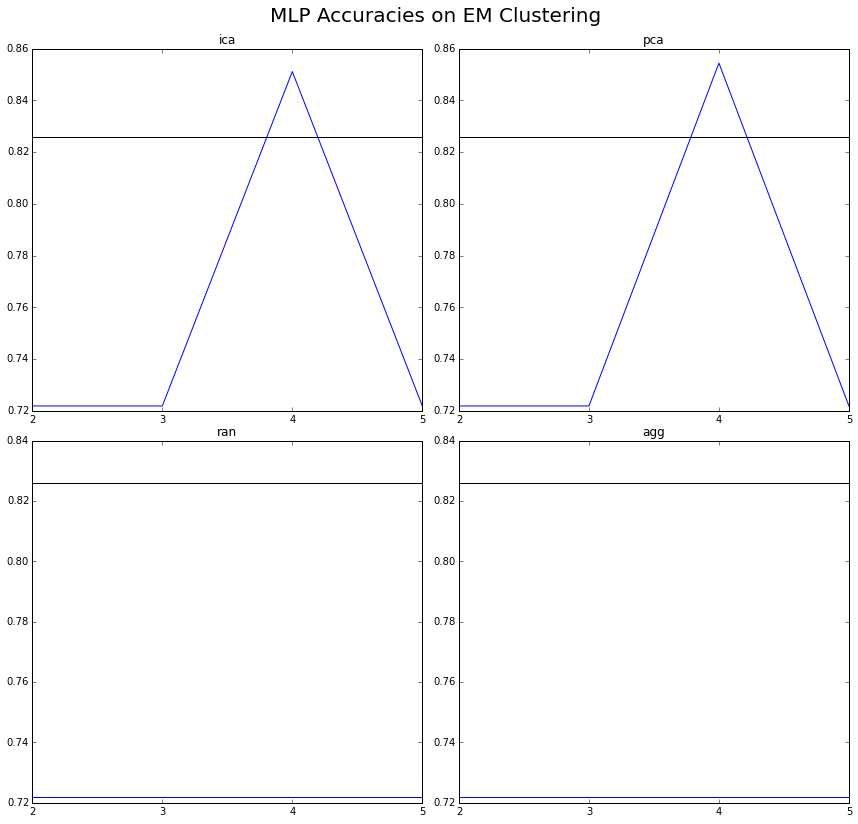

In [324]:
# Clustering on 2D Reductions (Refusing to reduce, cluster, then reduce again)
# 2D comparisons
fig, axes = plt.subplots(2,2, figsize=(12,12))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
axes = axes.reshape(-1)
for i, red in enumerate(em_cluster_labels):
    ax = axes[i]
    ax.plot(net_acc_cluster_only['em'][red])
    ax.set_title("{}".format(red))
    ax.set_xticks(np.arange(len(red_cluster_range)))
    ax.set_xticklabels(red_cluster_range)
    ax.hlines(baseline,0,len(red_cluster_range) - 1)
    
fig.suptitle("MLP Accuracies on EM Clustering", size=20)
fig.savefig("{}/{}_em_only_net_acc.png".format(save_dir, dset))

In [327]:
# Stored in cluster_labels
net_acc_cluster_add = {}
net_acc_cluster_add['km'] = {}
net_acc_cluster_add['em'] = {}
for red in km_cluster_labels:
    net_acc_cluster_add['km'][red] = []
    for label in km_cluster_labels[red]:
        label_feat = label[:, np.newaxis]
        aug_x  = np.concatenate((x, label_feat), axis=1)
        net_acc_cluster_add['km'][red].append(cross_val_score(clf, aug_x, y, scoring='accuracy', cv=kf).mean())
        
for red in em_cluster_labels:
    net_acc_cluster_add['em'][red] = []
    for label in em_cluster_labels[red]:
        label_feat = label[:, np.newaxis]
        aug_x  = np.concatenate((x, label_feat), axis=1)
        net_acc_cluster_add['em'][red].append(cross_val_score(clf, aug_x, y, scoring='accuracy', cv=kf).mean())

/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


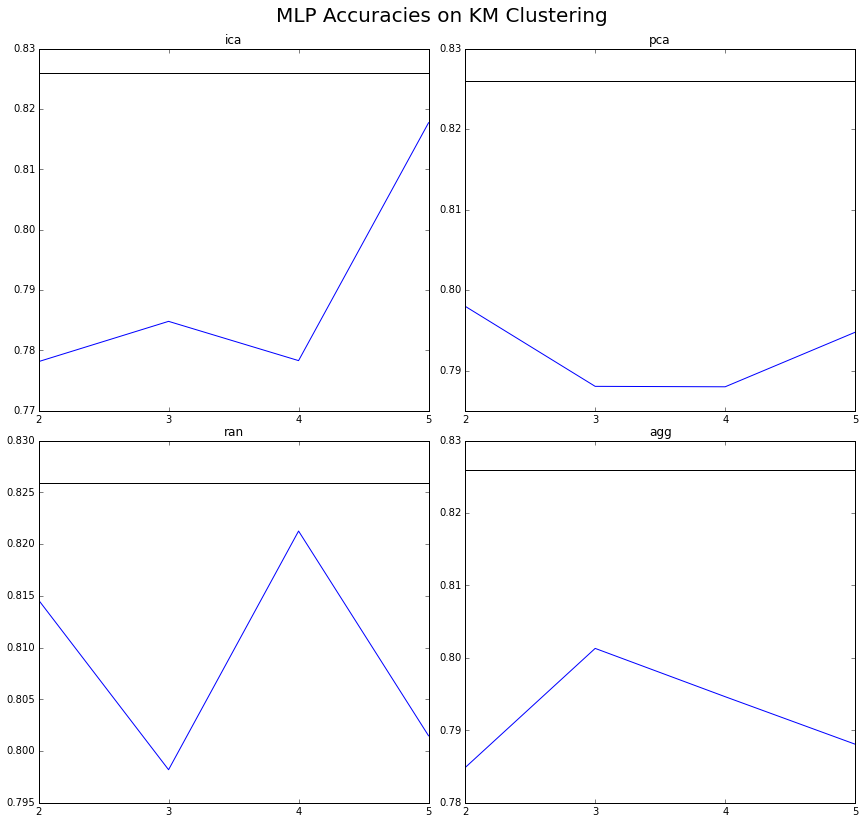

In [328]:
# Clustering on 2D Reductions (Refusing to reduce, cluster, then reduce again)
# 2D comparisons
fig, axes = plt.subplots(2,2, figsize=(12,12))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
axes = axes.reshape(-1)
for i, red in enumerate(km_cluster_labels):
    ax = axes[i]
    ax.plot(net_acc_cluster_add['km'][red])
    ax.set_title("{}".format(red))
    ax.set_xticks(np.arange(len(red_cluster_range)))
    ax.set_xticklabels(red_cluster_range)
    ax.hlines(baseline,0,len(red_cluster_range) - 1)
    
fig.suptitle("MLP Accuracies on KM Clustering Added", size=20)
fig.savefig("{}/{}_km_add_net_acc.png".format(save_dir, dset))

/home/joel/anaconda2/envs/pyEnv/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


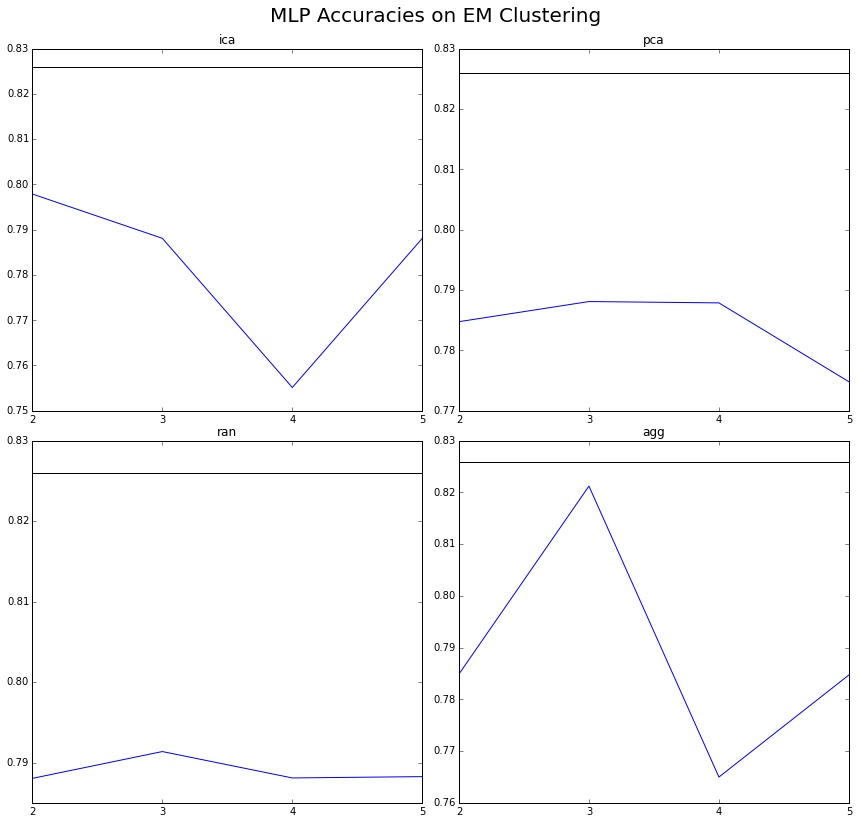

In [329]:
# Clustering on 2D Reductions (Refusing to reduce, cluster, then reduce again)
# 2D comparisons
fig, axes = plt.subplots(2,2, figsize=(12,12))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
axes = axes.reshape(-1)
for i, red in enumerate(em_cluster_labels):
    ax = axes[i]
    ax.plot(net_acc_cluster_add['em'][red])
    ax.set_title("{}".format(red))
    ax.set_xticks(np.arange(len(red_cluster_range)))
    ax.set_xticklabels(red_cluster_range)
    ax.hlines(baseline,0,len(red_cluster_range) - 1)
    
fig.suptitle("MLP Accuracies on EM Clustering Added", size=20)
fig.savefig("{}/{}_em_add_net_acc.png".format(save_dir, dset))